<a href="https://colab.research.google.com/github/rmanzi13/Proyecto_Credit_Scoring/blob/main/Procesamiento_Exploracion_Datos_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_banco = pd.read_csv('german_credit.csv')
df_banco.head(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [ ]:
# Buscamos duplicados
df_banco_sin_duplicados = df_banco.drop_duplicates()

In [ ]:
df_banco_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [ ]:
# Buscamos nulos
df_banco.isnull().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [ ]:
# Configurar pandas para mostrar todas las filas
pd.set_option('display.max_rows', None)

In [ ]:
# Imprimir la columna completa
print(df_banco['credits_this_bank'])  # estado comprobación cuenta

In [ ]:
print(df_banco['credit_history'])

In [ ]:
# Mapear las categorías a números 'account_check-status'
mapeo_account = {'< 0 DM': 1, '0 <= ... < 200 DM': 2, '>= 200 DM / salary assignments for at least 1 year': 3, 'no checking account': 4}

In [ ]:
# Aplicar el mapeo a la columna account_check_status
df_banco['account_check_status'] = df_banco['account_check_status'].map(mapeo_account)

In [ ]:
df_banco['rango_plazos_credito'] = pd.cut(df_banco['duration_in_month'], bins=[0, 12, 24, 36, 48, 60, 72], labels = [1, 2, 3, 4, 5, 6])

In [ ]:
# Mapeo las categorías a números 'credit_history'
mapeo = {'no credits taken/ all credits paid back duly': 1,
                    'all credits at this bank paid back duly': 2,
                    'existing credits paid back duly till now': 3,
                    'delay in paying off in the past': 4,
                    'critical account/ other credits existing (not at this bank)' : 5}

In [ ]:
# Aplicamos el mapeo a la columna credit_history
df_banco['credit_history'] = df_banco['credit_history'].map(mapeo)

In [ ]:
# Mapeo las categorías a números  'purpose'
mapeo_purpose = {'car (new)': 1, 'car (used)': 2, 'furniture/equipment': 3, 'radio/television': 4, 'domestic appliances': 5, 'repairs': 6, 'education': 7, '(vacation - does not exist?)': 8,
                 'retraining': 9, 'business': 10, 'others': 11}

In [ ]:
# Aplicamos el mapeo a la columna purpose
df_banco['purpose'] = df_banco['purpose'].map(mapeo_purpose)

In [ ]:

df_banco['credit_amount'].unique()

In [ ]:
# Diccionario de mapeo 'credit_account'
mapeo_amount = {
    (1, 1000): 1,
    (1000, 2000): 2,
    (2000, 3000): 3,
    (3000, 4000): 4,
    (4000, 5000): 5,
    (5000, 6000): 6,
    (6000, 7000): 7,
    (7000, 8000): 8,
    (8000, 9000): 9,
    (9000, 10000): 10,
    (10000, 11000): 11,
    (11000, 12000): 12,
    (12000, 13000): 13,
    (13000, 14000): 14,
    (14000, 15000): 15,
    (15000, 16000): 16,
    (16000, 17000): 17,
    (17000, 18000): 18,
    (18000, 19000): 19,
    (19000, 20000): 20
}

In [ ]:
## df_banco['credit_amount'].map(...): Aplica una función a cada elemento de la columna 'credit_amount' del DataFrame df_banco., lambda x: next((v for k, v in mapeo_amount.items()
# if k[0] < x <= k[1]), None): Utiliza una función lambda para cada valor x en 'credit_amount'. Esta función lambda busca en el diccionario mapeo_amount el primer rango (k[0],
# k[1]), tal que x esté dentro de ese rango, y devuelve el valor correspondiente v. Si no se encuentra ningún rango que cumpla la condición, devuelve None.

In [ ]:
# Aplicar el mapeo a la columna credit_amount
df_banco['rango_valor_credito'] = df_banco['credit_amount'].map(lambda x: next((v for k, v in mapeo_amount.items() if k[0] < x <= k[1]), None))

In [ ]:
df_banco = df_banco.drop(['duration_in_month','credit_amount'], axis=1)

In [ ]:
df_banco.head(3)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,...,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,...,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1,2
1,1,2,3,5,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,...,22,none,own,1,skilled employee / official,1,none,yes,4,6
2,0,4,5,8,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,...,49,none,own,1,unskilled - resident,2,none,yes,1,3


In [ ]:
# Mapear las categorías a números 'savings'
mapeo_savings = {'unknown/ no savings account': 1, '.. >= 1000 DM ': 2, '500 <= ... < 1000 DM ': 3, '100 <= ... < 500 DM': 4, '... < 100 DM': 5}

In [ ]:
# Aplicar el mapeo a la columna savings
df_banco['savings'] = df_banco['savings'].map(mapeo_savings)

In [ ]:
df_banco.head(3)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,...,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,.. >= 7 years,4,male : single,none,4,...,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1,2
1,1,2,3,5,5,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,...,22,none,own,1,skilled employee / official,1,none,yes,4,6
2,0,4,5,8,5,4 <= ... < 7 years,2,male : single,none,3,...,49,none,own,1,unskilled - resident,2,none,yes,1,3


In [ ]:
# Mapear las categorías a números 'present_emp_since'
mapeo_employment = {'.. >= 7 years': 1, '4 <= ... < 7 years': 2, '1 <= ... < 4 years': 3, '... < 1 year ': 4, 'unemployed': 5}

In [ ]:
# Aplicar el mapeo a la columna savings
df_banco['present_emp_since'] = df_banco['present_emp_since'].map(mapeo_employment)

In [ ]:
df_banco.head(3)

In [ ]:
# Creamos una función para realizar una codificación binaria de las columnas "personal_status_sex" y "civil_status" en dos nuevas columnas llamadas "sex" y "civil_status".
# A esta función le pasaremos el dataframe original
def feature_engineering(df):
    # Crear columnas 'sex' y 'civil_status' con valores binarios
    df['sexo'] = df['personal_status_sex'].apply(lambda x: 1 if 'female' in x.lower() else 0)
    df['estado_civil'] = df['personal_status_sex'].apply(lambda x: 1 if 'single' in x.lower() else 0)

    # Eliminar la columna original 'personal_status_sex'
    df = df.drop('personal_status_sex', axis=1)

    return df

In [ ]:
# Aplicar la función de ingeniería de características al DataFrame df_banco
df_banco = feature_engineering(df_banco)

In [ ]:
df_banco.head(3)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,...,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,rango_plazos_credito,rango_valor_credito,sexo,estado_civil
0,0,1,5,5,1,1,4,none,4,real estate,...,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1,2,0,1
1,1,2,3,5,5,3,2,none,2,real estate,...,own,1,skilled employee / official,1,none,yes,4,6,1,0
2,0,4,5,8,5,2,2,none,3,real estate,...,own,1,unskilled - resident,2,none,yes,1,3,0,1


In [ ]:
# Mapear las categorías a números 'other_debtors'
mapeo_debtors = {'none': 1, 'co-applicant': 2, 'guarantor': 3}

In [ ]:
# Aplicar el mapeo de la columna 'other debtors'
df_banco['other_debtors'] = df_banco['other_debtors'].map(mapeo_debtors)

In [ ]:
df_banco.head(6)

In [ ]:
mapeo_property = {'real estate': 1, 'if not A121 : building society savings agreement/ life insurance': 2, 'if not A121/A122 : car or other, not in attribute 6': 3,
                  'unknown / no property': 4}

In [ ]:
df_banco['property'] = df_banco['property'].map(mapeo_property)

In [ ]:
df_banco.head(3)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,...,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,rango_plazos_credito,rango_valor_credito,sexo,estado_civil
0,0,1,5,5,1,1,4,1,4,1,...,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1,2,0,1
1,1,2,3,5,5,3,2,1,2,1,...,own,1,skilled employee / official,1,none,yes,4,6,1,0
2,0,4,5,8,5,2,2,1,3,1,...,own,1,unskilled - resident,2,none,yes,1,3,0,1


In [ ]:
df_banco['rango_edad'] = pd.cut(df_banco['age'], bins = [18, 30, 40 ,50, 60, 70, 80], labels = [1, 2, 3, 4, 5, 6])
df_banco = df_banco.drop('age', axis = 1)

In [ ]:
df_banco.head(3)

In [ ]:
mapeo_payments = {'bank': 1, 'stores': 2, 'none': 3}

In [ ]:
df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(mapeo_payments)

In [ ]:
df_banco.head(3)

In [ ]:
mapeo_lodging = {'rent': 1, 'own': 2, 'for free': 3}
df_banco['housing'] = df_banco['housing'].map(mapeo_lodging)

In [ ]:
df_banco.head(3)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,...,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,rango_plazos_credito,rango_valor_credito,sexo,estado_civil,rango_edad
0,0,1,5,5,1,1,4,1,4,1,...,2,skilled employee / official,1,"yes, registered under the customers name",yes,1,2,0,1,5
1,1,2,3,5,5,3,2,1,2,1,...,1,skilled employee / official,1,none,yes,4,6,1,0,1
2,0,4,5,8,5,2,2,1,3,1,...,1,unskilled - resident,2,none,yes,1,3,0,1,3


In [ ]:
mapeo_occupation = {'unemployed/ unskilled - non-resident': 1, 'unskilled - resident': 2, 'skilled employee / official': 3, 'management/ self-employed/ highly qualified employee/ officer': 4}
df_banco['job'] = df_banco['job'].map(mapeo_occupation)

In [ ]:
df_banco.head(3)

In [ ]:
mapeo_phone = {'none': 0, 'yes, registered under the customers name ': 1}
df_banco['telephone'] = df_banco['telephone'].map(mapeo_phone)

In [ ]:
mapeo_foreign = {'yes': 1, 'no': 0}
df_banco['foreign_worker'] = df_banco['foreign_worker'].map(mapeo_foreign)

In [ ]:
df_banco.head(3)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,...,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,rango_plazos_credito,rango_valor_credito,sexo,estado_civil,rango_edad
0,0,1,5,5,1,1,4,1,4,1,...,2,3,1,1,1,1,2,0,1,5
1,1,2,3,5,5,3,2,1,2,1,...,1,3,1,0,1,4,6,1,0,1
2,0,4,5,8,5,2,2,1,3,1,...,1,2,2,0,1,1,3,0,1,3


In [ ]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [ ]:
# Nuestro dataframe final
df_banco.head(3)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,rango_plazos_credito,rango_valor_credito,sexo,estado_civil,rango_edad
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,1,2,0,1,5
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,4,6,1,0,1
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,0,1,1,3,0,1,3


In [ ]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   default                     1000 non-null   int64   
 1   account_check_status        1000 non-null   int64   
 2   credit_history              1000 non-null   int64   
 3   purpose                     1000 non-null   int64   
 4   savings                     1000 non-null   int64   
 5   present_emp_since           1000 non-null   int64   
 6   installment_as_income_perc  1000 non-null   int64   
 7   other_debtors               1000 non-null   int64   
 8   present_res_since           1000 non-null   int64   
 9   property                    1000 non-null   int64   
 10  other_installment_plans     1000 non-null   int64   
 11  housing                     1000 non-null   int64   
 12  credits_this_bank           1000 non-null   int64   
 13  job                

In [ ]:
print(df_banco['telephone'])

In [ ]:
print(df_banco['forei'])

# Exploración de los datos

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

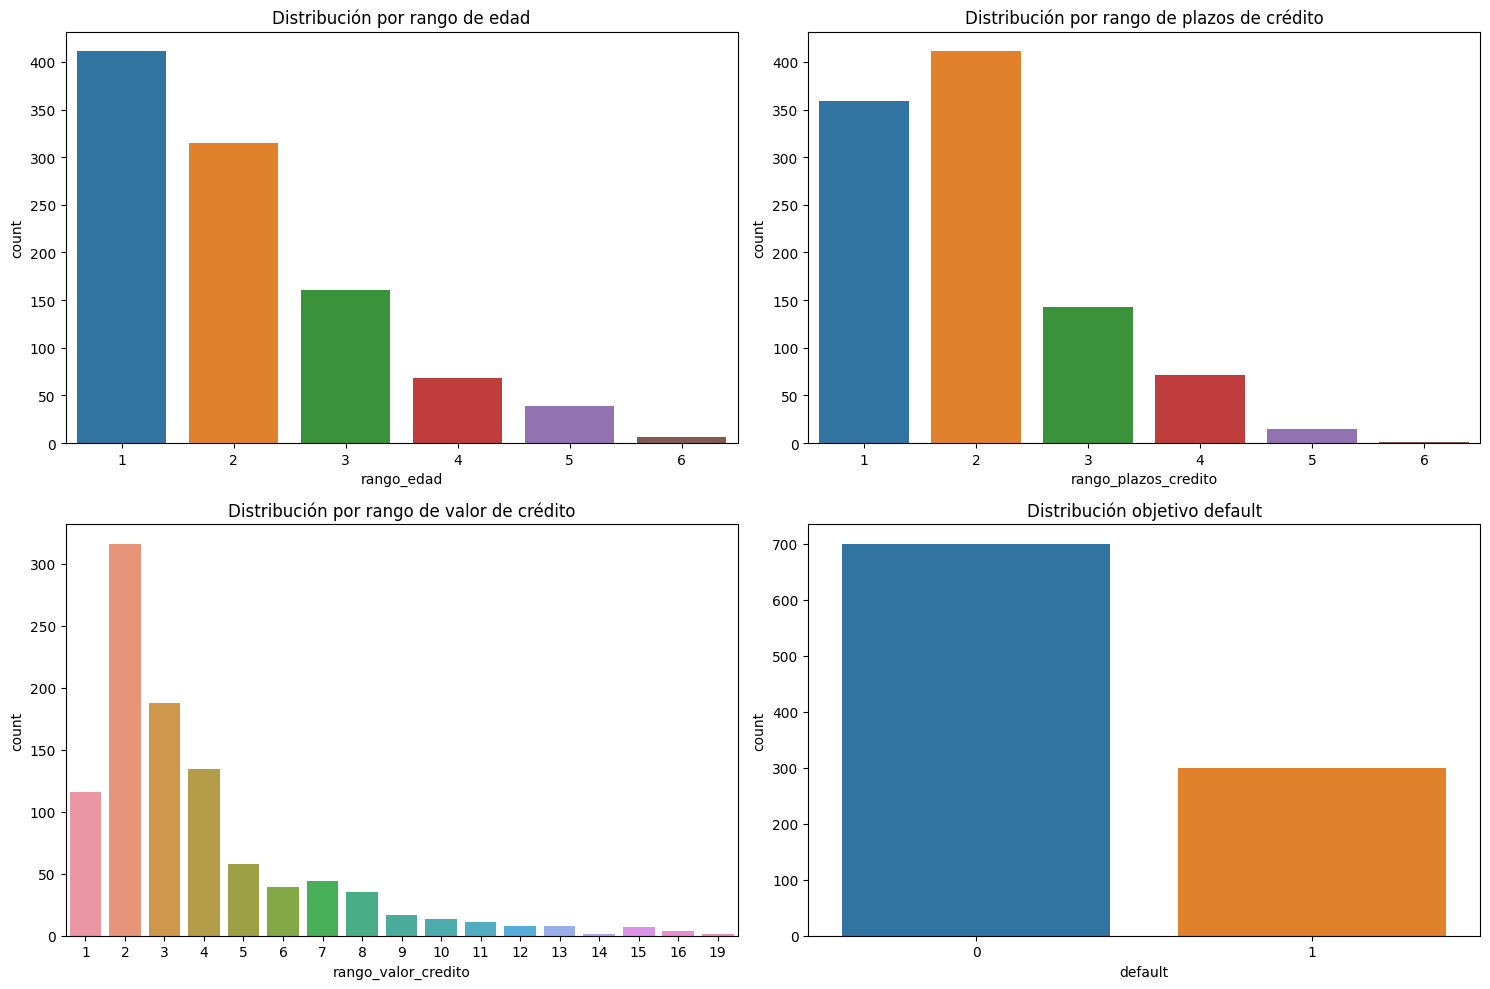

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos subgráficos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Graficamos en el primer subgráfico
sns.countplot(x='rango_edad', data=df_banco, ax=axes[0, 0])
axes[0, 0].set_title('Distribución por rango de edad')

# Graficamos en el segundo subgráfico
sns.countplot(x='rango_plazos_credito', data=df_banco, ax=axes[0, 1])
axes[0, 1].set_title('Distribución por rango de plazos de crédito')

# Graficamos en el tercer subgráfico
sns.countplot(x='rango_valor_credito', data=df_banco, ax=axes[1, 0])
axes[1, 0].set_title('Distribución por rango de valor de crédito')

# Graficamos en el cuarto subgráfico
sns.countplot(x = 'default', data = df_banco, ax = axes[1,1])
axes[1,1].set_title('Distribución objetivo default')

# Ajustamos el diseño para evitar superposiciones
plt.tight_layout()

# Mostramos los gráficos
plt.show()


Text(0.5, 1.0, 'Distribución variable objetivo default')

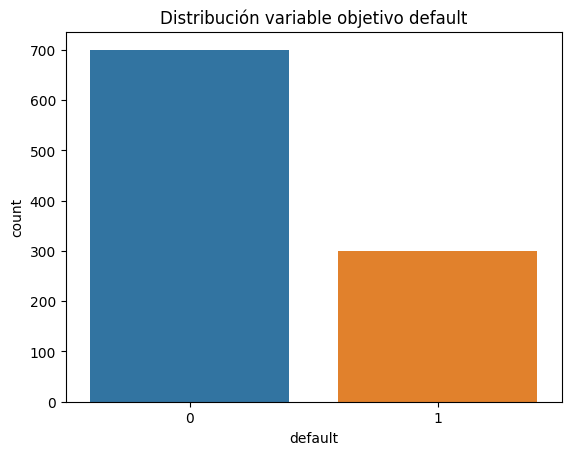

In [ ]:
ax = sns.countplot(x = 'default', data = df_banco)
ax.set_title('Distribución variable objetivo default')

<ipython-input-69-d38759b44641>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt=".2f")


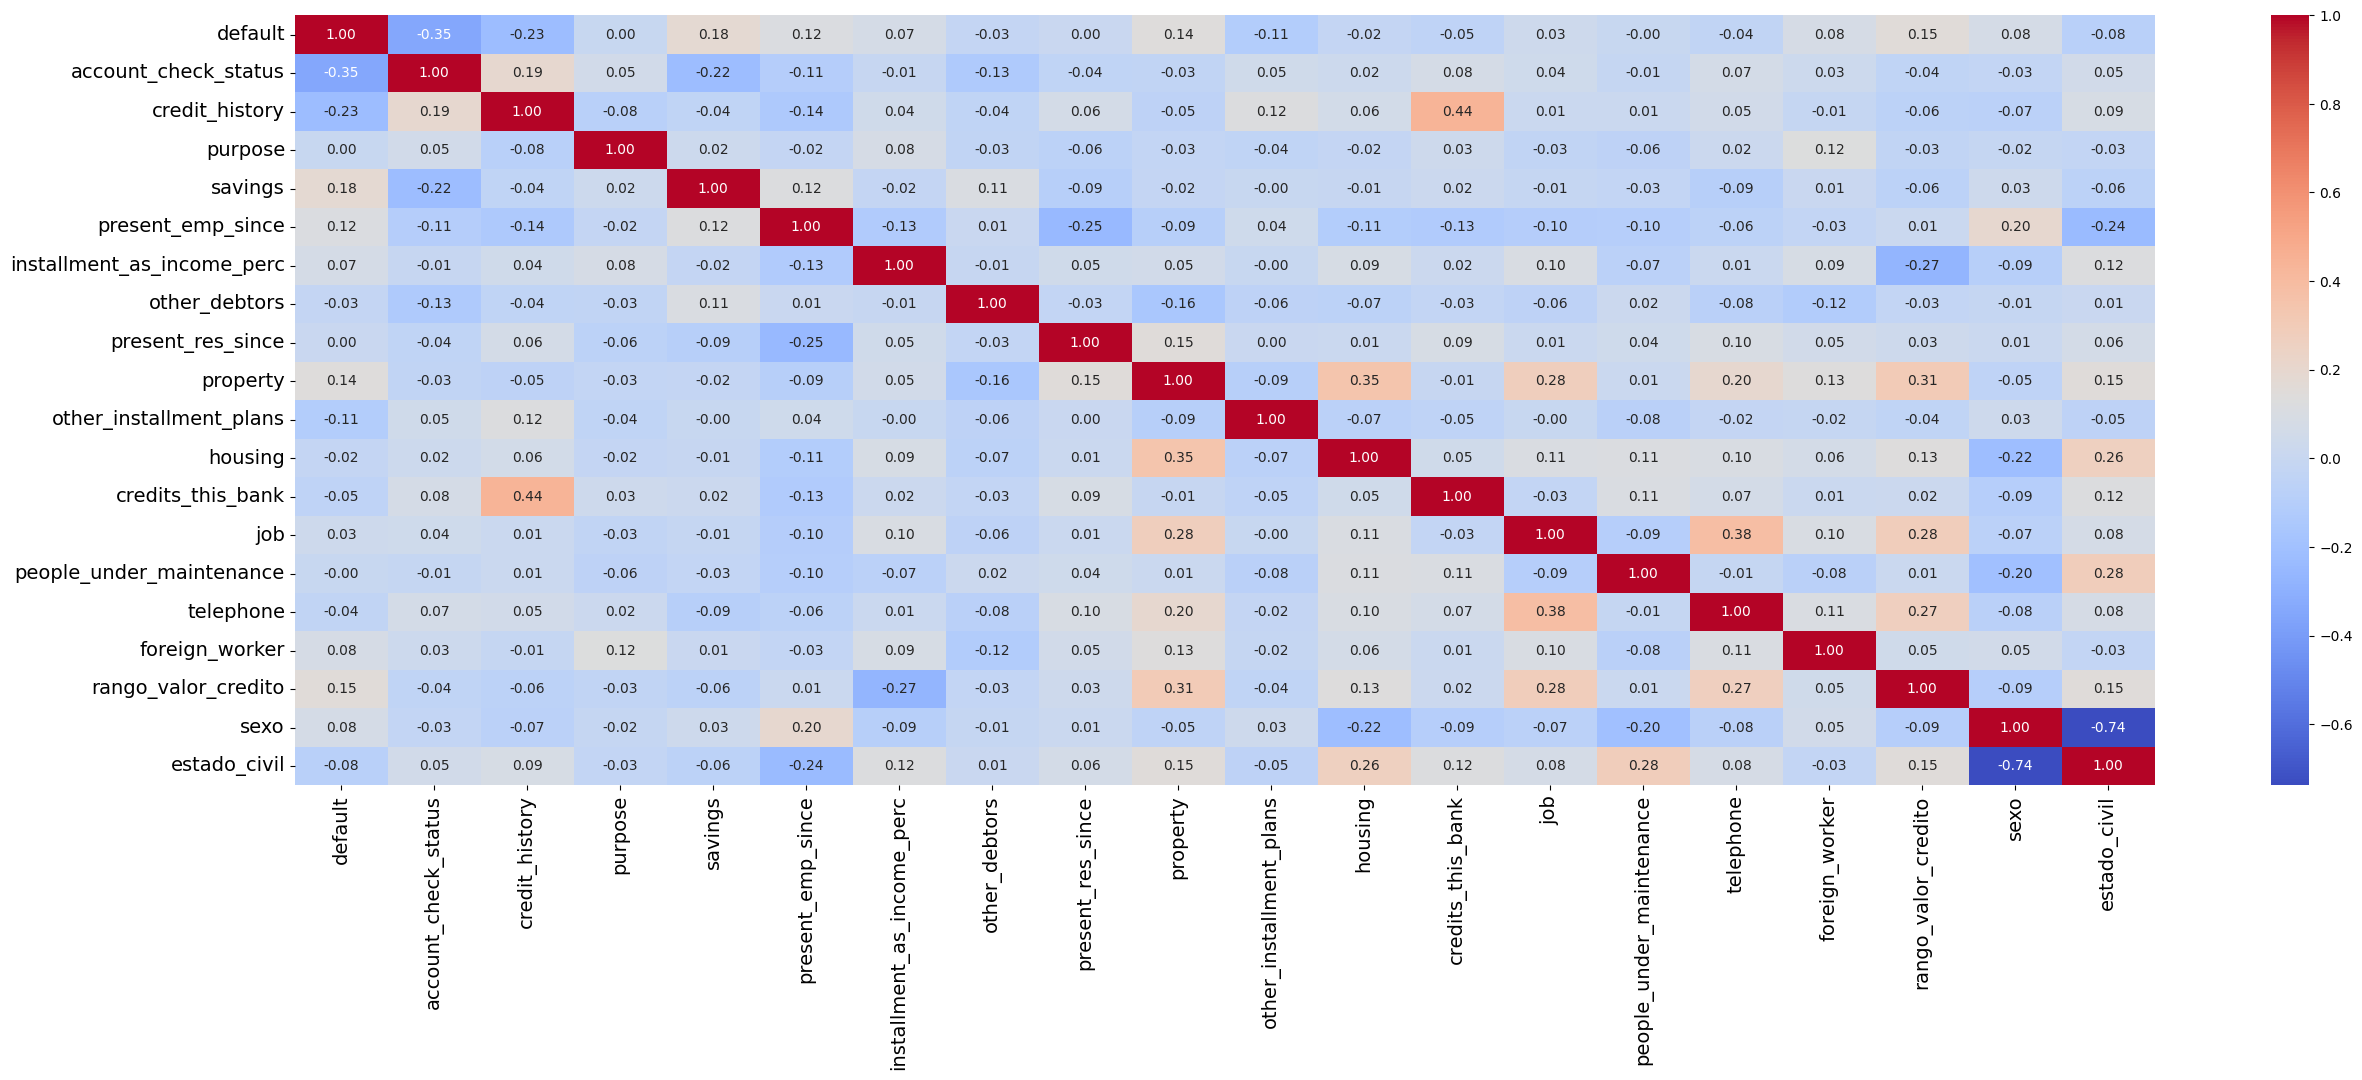

In [ ]:
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)

In [ ]:
# confirmando datos de columnas
print(df_banco[['rango_edad', 'rango_plazos_credito']].isnull().sum())


rango_edad              0
rango_plazos_credito    0
dtype: int64


In [ ]:
print(df_banco[['rango_edad', 'rango_plazos_credito']].nunique())


rango_edad              6
rango_plazos_credito    6
dtype: int64


In [ ]:
# Confirmando tipo de cada columna
print(df_banco[['rango_edad', 'rango_plazos_credito']].dtypes)


rango_edad              category
rango_plazos_credito    category
dtype: object


In [ ]:
# Obtenemos representación numérica con cat.codes en las columnas tipo categóricas para que se puedan ver en mi matriz de correlación
df_banco['rango_edad'] = df_banco['rango_edad'].cat.codes
df_banco['rango_plazos_credito'] = df_banco['rango_plazos_credito'].cat.codes

In [ ]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default                     1000 non-null   int64
 1   account_check_status        1000 non-null   int64
 2   credit_history              1000 non-null   int64
 3   purpose                     1000 non-null   int64
 4   savings                     1000 non-null   int64
 5   present_emp_since           1000 non-null   int64
 6   installment_as_income_perc  1000 non-null   int64
 7   other_debtors               1000 non-null   int64
 8   present_res_since           1000 non-null   int64
 9   property                    1000 non-null   int64
 10  other_installment_plans     1000 non-null   int64
 11  housing                     1000 non-null   int64
 12  credits_this_bank           1000 non-null   int64
 13  job                         1000 non-null   int64
 14  people_un

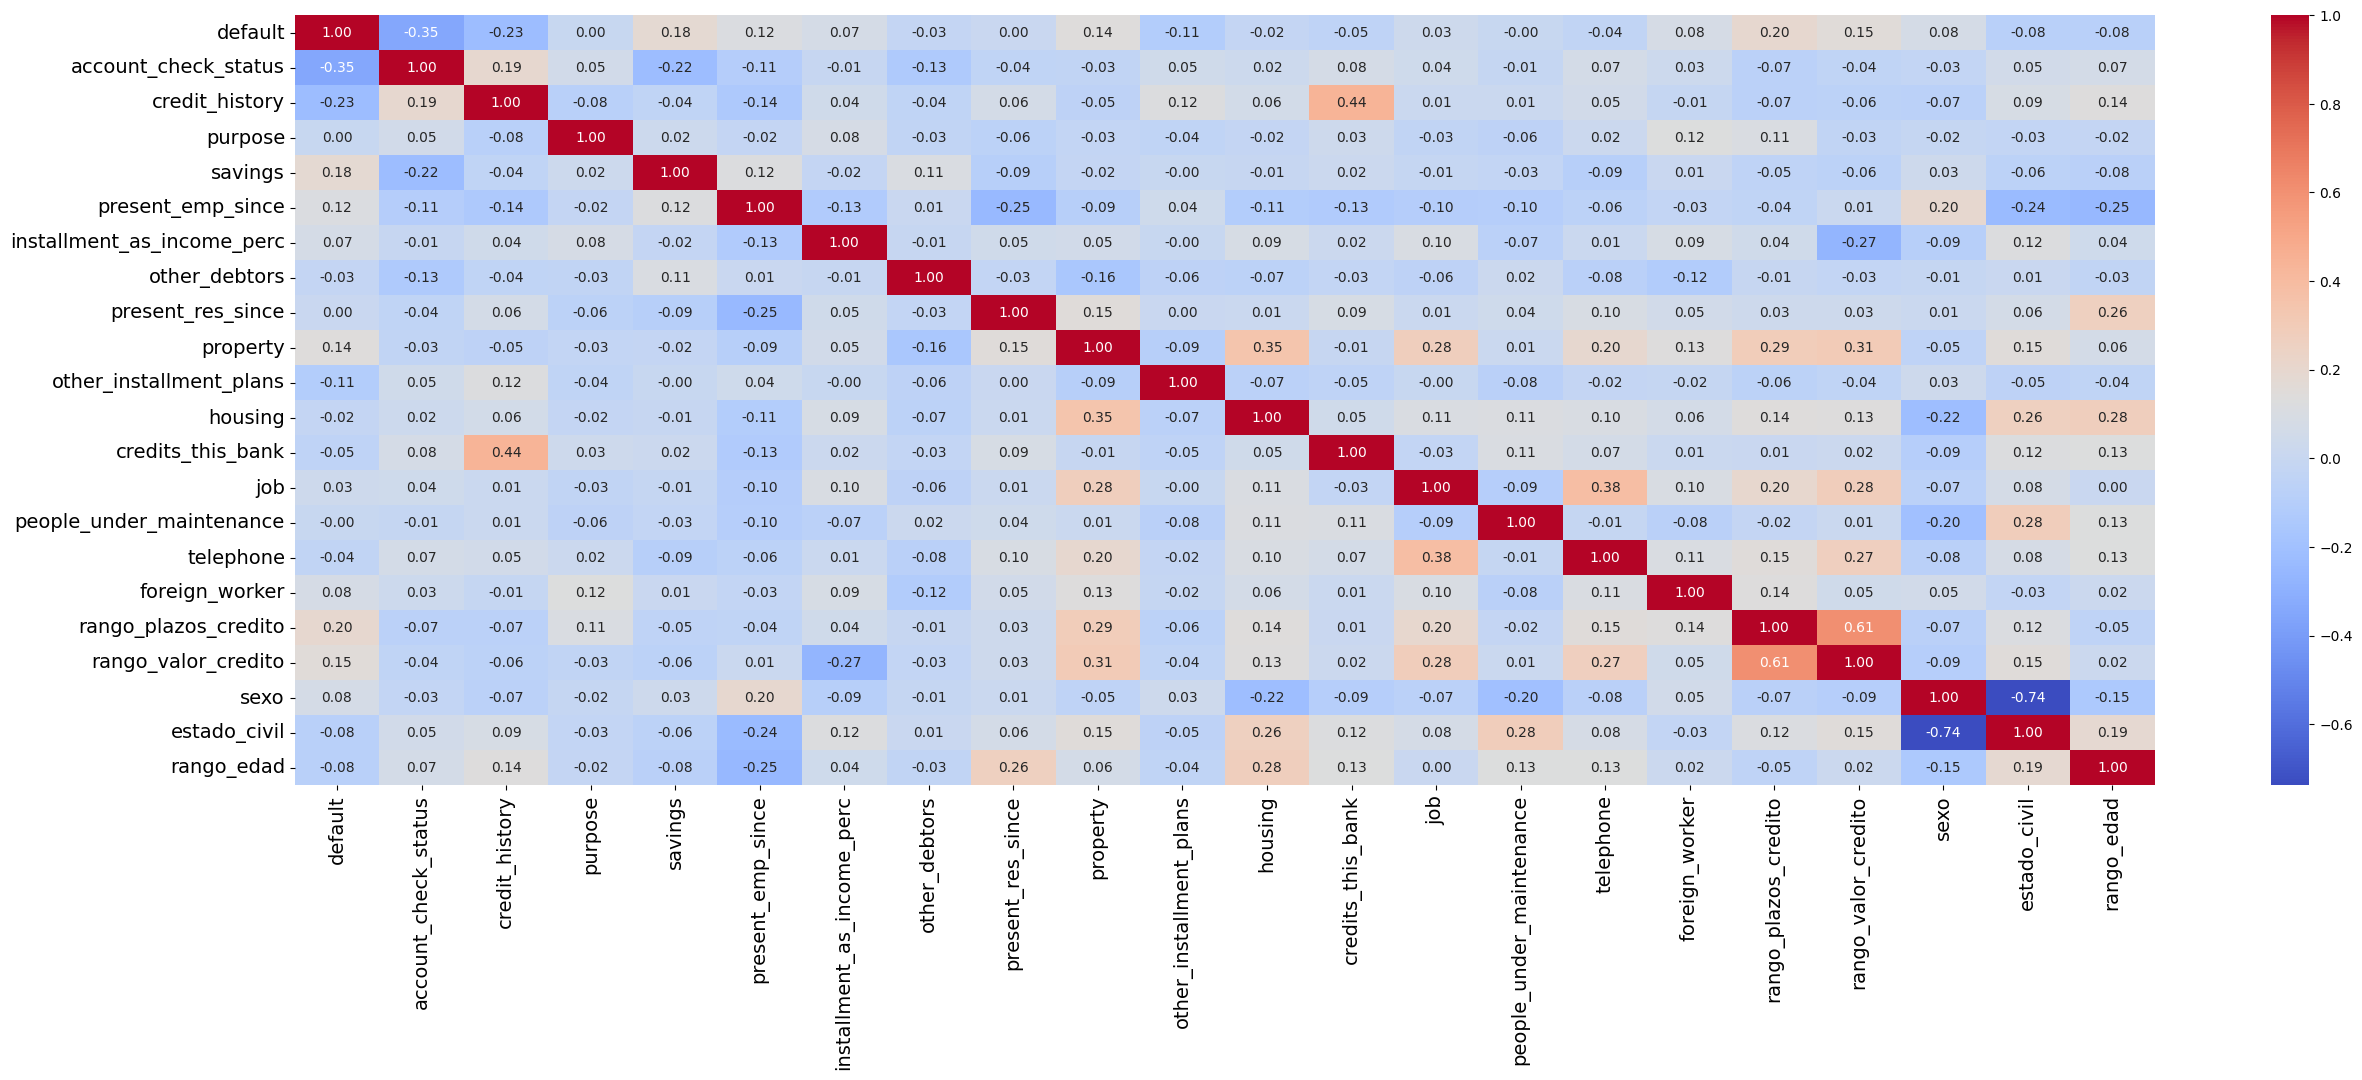

In [ ]:
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)

In [ ]:
# Agrupando datos
print(df_banco.groupby(['sexo', 'estado_civil']).size())

sexo  estado_civil
0     0               142
      1               548
1     0               310
dtype: int64


In [ ]:
'''
foreign worker
	       1 : yes
	       0 : no
femenino: 1
masculino: 0

soltero: 1
otros : 0

In [ ]:
# Agrupando datos. A pesar de nuestros valores de 0.74 del estado civil y sexo, hemos decicido conservar todas las columnas, ya que también están realcionados con otras
# columnas como foreign_worker
print(df_banco.groupby(['sexo','estado_civil', 'foreign_worker']).size())

sexo  estado_civil  foreign_worker
0     0             0                   7
                    1                 135
      1             0                  23
                    1                 525
1     0             0                   7
                    1                 303
dtype: int64


In [ ]:
df_banco.to_csv('german_credit_numeric.csv', index = False)